#Regression in Python

###Author   : Sarthak Miglani
###Data Set : Big Tech Stocks

##Importing Data_Set

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/hw-04-sarthakMiglani726/main/Data/big_tech_stock_prices.csv', header='infer')
data

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...,...
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


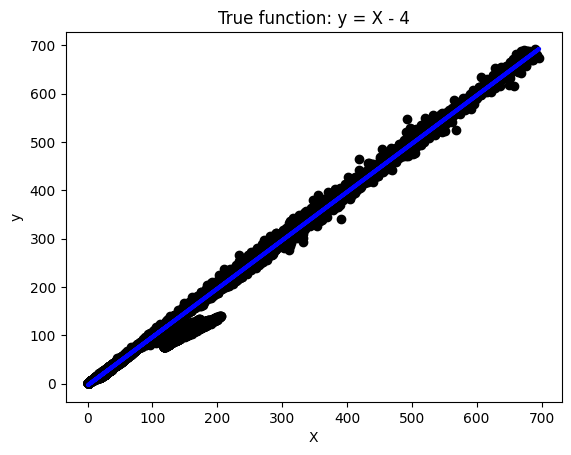

In [206]:
X = data[['open', 'volume']]
y = data['adj_close']
numInstances = data.shape[0]

y_true = 1*X['open'] - 4

plt.scatter(X['open'], y,  color='black')
plt.plot(X['open'], y_true, color='blue', linewidth=3)
plt.title('True function: y = X - 4')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##Multiple Linear Regression

###Step 1: Split Input Data into Training and Test Sets

In [207]:
numTest = 4509   # number of training instances
numTrain = numInstances - numTest

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

###Step 2: Fit Regression Model to Training Set

In [208]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression()

###Step 3: Apply Model to the Test Set

In [209]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

###Step 4: Evaluate Model Performance on Test Set

Root mean squared error = 4.6718
R-squared = 0.9966


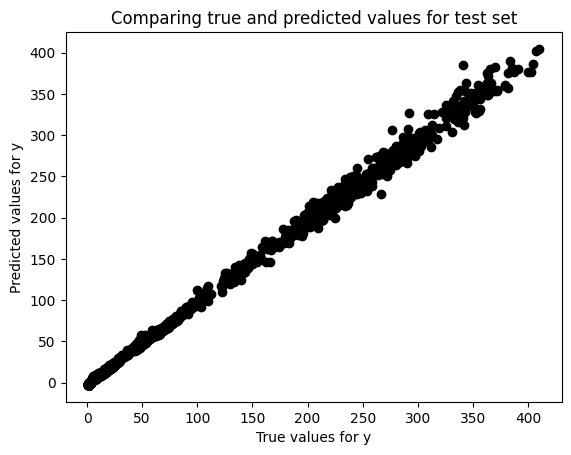

In [210]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

###Step 5: Postprocessing

In [211]:
# Display model parameters
print('Slope = ', regr.coef_[0])

Slope =  0.9910623390232274


In [212]:
print('Intercept = ', regr.intercept_)

Intercept =  -4.156459493452488


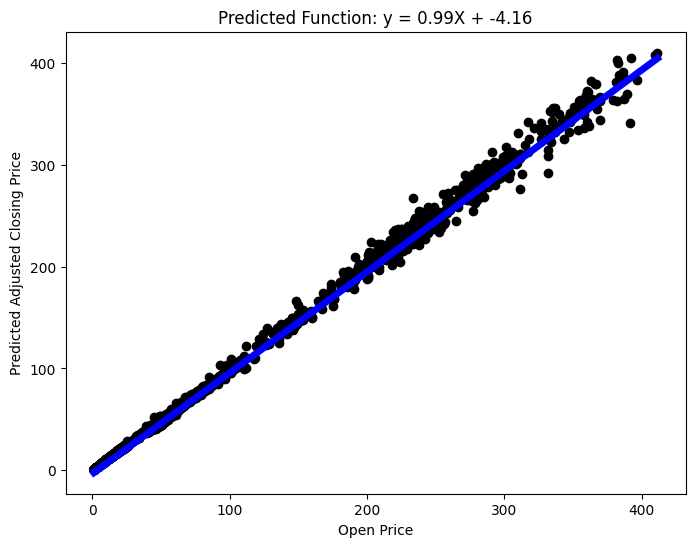

In [213]:
# Generating a range of 'open' prices
open_price_range = np.linspace(X_test['open'].min(), X_test['open'].max(), 100).reshape(-1, 1)

# Since we have another feature 'volume', we need to include it for prediction
# We will use the mean volume from the test set for this purpose
mean_volume = X_test['volume'].mean()

# Creating a new test set with the range of open prices and mean volume
new_test_set = np.hstack((open_price_range, np.full(open_price_range.shape, mean_volume)))


# Creating a DataFrame for the new test set with appropriate column names
new_test_df = pd.DataFrame(new_test_set, columns=['open', 'volume'])

# Predicting 'adj_close' prices using the DataFrame
predicted_adj_close_df = regr.predict(new_test_df)

# Re-plotting the regression line without the warning
plt.figure(figsize=(8, 6))
plt.scatter(X_test['open'], y_test, color='black')
plt.plot(open_price_range, predicted_adj_close_df, color='blue', linewidth=5)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('Open Price')
plt.ylabel('Predicted Adjusted Closing Price')
plt.show()

##MLR Overview:
In this analysis, we used linear regression to understand how daily opening prices and trading volumes influence the adjusted closing prices of stocks. We split our dataset into a training set and a test set, fitting a linear regression model to the training data and then applying it to the test data. The model's performance was evaluated using the root mean squared error and R-squared metrics, and we explored the relationship between opening prices and predicted adjusted closing prices visually. The results provide insights into how opening prices and volumes are predictive of closing prices in the stock market.

##MLR Summery:

The analysis reveals that there's a very close match between what stocks start at in the morning and what they end at after adjustments when the market closes. This match is numerically strong, with an R-squared value of 0.9966, which means 99.66% of the price changes can be explained by our model. The slope of the prediction line is 0.99, almost exactly 1, showing that the open and close prices move almost in lockstep. The intercept is -4.16, slightly shifting the line down. A small error measure, at 4.6718, indicates the predictions are highly accurate, which we can also see in graphs where the dots (real values) and line (predictions) are almost on top of each other.


##Effect of Correlated Attributes

Text(0.5, 1.0, 'Correlation between X3 and X4 = 0.9999')

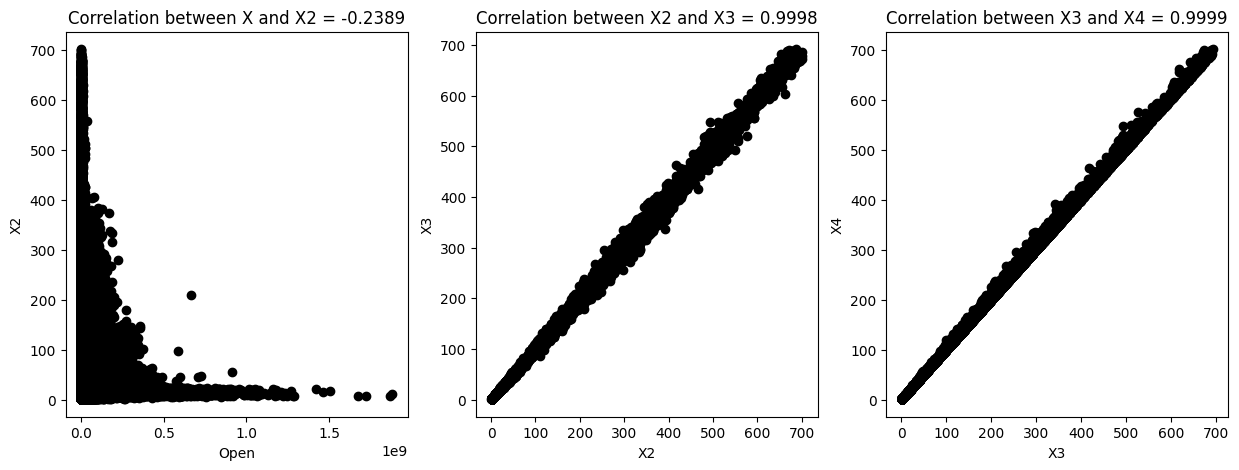

In [214]:
X2 = data[['high','low']]
X3 = data[['low','close']]
X4 = data[['close','high']]

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('Open')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

In [215]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))

In [216]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

LinearRegression()

In [217]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

LinearRegression()

In [218]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

LinearRegression()

In [219]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)

,Model,Train error,Test error,Sum of Absolute Weights
0,0.99 X + -4.16,11.012823,4.671786,5.147522
1,-0.58 X + 0.00 X2 + -3.75,10.531049,4.083485,6.737703
2,0.11 X + 0.00 X2 + 1.04 X3 + -3.75,10.454605,3.882205,7.352001
3,0.11 X + 0.00 X2 + 0.52 X3 + -0.66 X4 + -3.75,10.454605,3.882205,7.352001


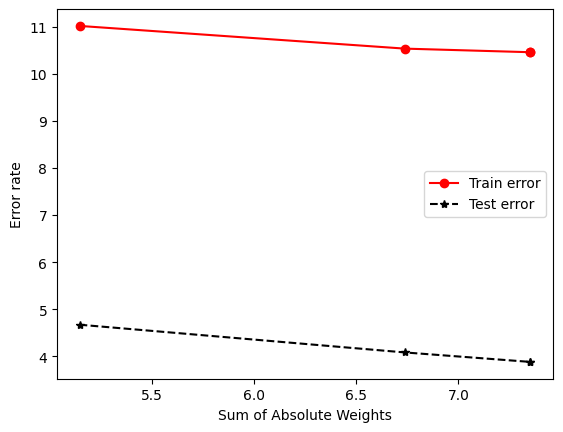

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0], regr.intercept_)
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)),
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_).sum() + np.absolute(regr.intercept_)]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0], regr2.coef_[1], regr2.intercept_)
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)),
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_).sum() + np.absolute(regr2.intercept_)]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0], regr3.coef_[1],
                                                regr3.coef_[2], regr3.intercept_)
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)),
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_).sum() + np.absolute(regr3.intercept_)]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0], regr4.coef_[1],
                                        regr4.coef_[2], regr4.coef_[3], regr4.intercept_)
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)),
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_).sum() + np.absolute(regr4.intercept_)]

results = pd.DataFrame([values1, values2, values3, values4], columns=columns)

results = pd.DataFrame([values1, values2, values3, values4], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results

##Effect of Correlated Attributes Summary:
The study checked how opening, high, low, and closing stock prices are linked, finding a super strong connection between the low and closing prices, with a correlation of 0.9999. When we used these linked prices to predict the closing prices, the model's error rate got a bit better, from 4.67 to 3.88, as we included more related prices. However, the complexity of the model also increased, with the sum of the weights rising from 5.15 to 7.35, showing that more information isn't always the most efficient way to predict stock prices.

##Ridge Regression